In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import Adam, SGD  
from keras.models import load_model

Using TensorFlow backend.


In [4]:
x=np.load('/content/drive/My Drive/lict/namtadb/numta_x64.npy')/255.0
y=np.load('/content/drive/My Drive/lict/namtadb/numta_y64.npy')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
x=x.reshape(-1,64,64,1)
print(x.shape)
y = to_categorical(y)
print(y.shape)

(72045, 64, 64, 1)
(72045, 10)


In [11]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
model = Sequential()
model.add(Conv2D(input_shape=(64,64,1),filters=32,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=512,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=10, activation="softmax"))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 64, 64, 32)        320       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 128)       36992     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 128)       147584    
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 128)       0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 128)      

In [12]:
history = model.fit(x, y, validation_split=0.1, epochs=30, batch_size=250)

Train on 64840 samples, validate on 7205 samples
Epoch 1/30
64840/64840 [==============================] - 22s 344us/step - loss: 0.5852 - accuracy: 0.7969 - val_loss: 0.1457 - val_accuracy: 0.9548
Epoch 2/30
64840/64840 [==============================] - 22s 339us/step - loss: 0.0906 - accuracy: 0.9718 - val_loss: 0.1210 - val_accuracy: 0.9666
Epoch 3/30
64840/64840 [==============================] - 22s 338us/step - loss: 0.0497 - accuracy: 0.9847 - val_loss: 0.1030 - val_accuracy: 0.9697
Epoch 4/30
64840/64840 [==============================] - 22s 339us/step - loss: 0.0331 - accuracy: 0.9892 - val_loss: 0.1278 - val_accuracy: 0.9659
Epoch 5/30
64840/64840 [==============================] - 22s 339us/step - loss: 0.0244 - accuracy: 0.9923 - val_loss: 0.1114 - val_accuracy: 0.9699
Epoch 6/30
64840/64840 [==============================] - 22s 338us/step - loss: 0.0189 - accuracy: 0.9941 - val_loss: 0.1227 - val_accuracy: 0.9674
Epoch 7/30
64840/64840 [==============================] -

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'uppers left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


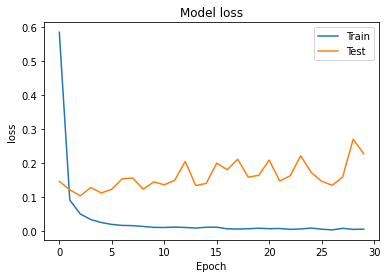

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Unrecognized location 'uppers left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  from ipykernel import kernelapp as app


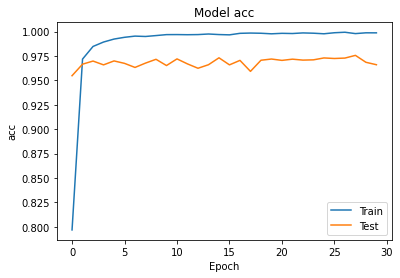

In [13]:
#graph 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='uppers left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='uppers left')
plt.show()

In [ ]:
#saving the model 
model.save_weights('ocr-weights-akash.h5')

In [ ]:
#saving
model.save('ocr-model-akash.h5') 

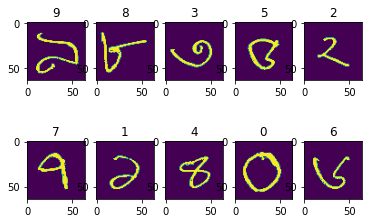

In [17]:
allimg=[]
for i in range(0,10):
  img1=cv2.imread(str(i)+'.jpg',0)
  (thresh,im_bw)=cv2.threshold(img1,128,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
  inv=cv2.bitwise_not(im_bw)
  allimg.append(cv2.resize(inv,(64,64)))
allimg=np.array(allimg)
temp=allimg.reshape(-1,64,64,1)
model.predict(temp)
#visualizing prdiction
for i in range(1,11):
  plt.subplot(2,5,i)
  plt.imshow(allimg[i-1])
  plt.title(np.argmax(model.predict(np.reshape(allimg[i-1],(-1,64,64,1)))))

(277, 260, 3)


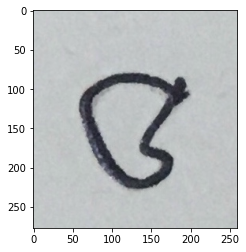

In [66]:
img1=cv2.imread('/content/3.jpg')
plt.imshow(img1)
print(img1.shape)

(277, 260)


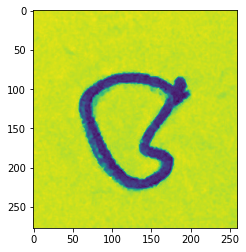

In [67]:

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
print(gray.shape)




(277, 260)


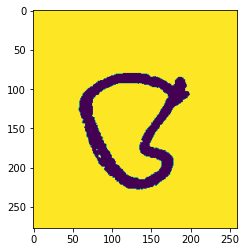

In [68]:
(thresh,im_bw)=cv2.threshold(gray,128,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU) #binary convertion must be done to only grayscale images
plt.imshow(im_bw)
print(gray.shape)


(277, 260)


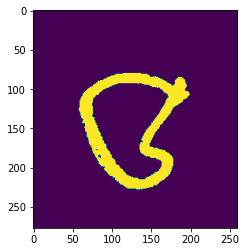

In [69]:
inv=cv2.bitwise_not(im_bw)
plt.imshow(inv)
print(inv.shape)


(277, 260)


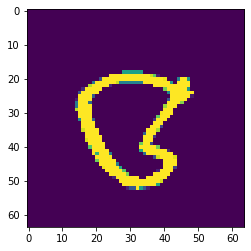

In [70]:
r=cv2.resize(inv,(64,64))
plt.imshow(r)
print(inv.shape)


In [80]:
temp=r.reshape(-1,64,64,1)
print(temp.shape)
print(type(temp))
p=np.argmax(model.predict(temp))
p

(1, 64, 64, 1)
<class 'numpy.ndarray'>


5

In [133]:
def segment(image, height=64):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (7, 7), 0)

    # threshold the image
    ret,thresh1 = cv2.threshold(gray ,100,255,cv2.THRESH_BINARY_INV)

    # dilate the white portions
    dilate = cv2.dilate(thresh1, None, iterations=2)

    # find contours in the image
    cnts = cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[1] if imutils.is_cv2() else cnts[0]

    orig = image.copy()
    i = 0
    t = 0
    c=0
    x_all = []
    w_all = []
    lines = []
    parts = []

    for cnt in cnts:
        # Check the area of contour, if it is very small ignore it
        if(cv2.contourArea(cnt) < 100):
            continue

        # Filtered countours are detected
        x,y,w,h = cv2.boundingRect(cnt)
        x_all.append(x)
        w_all.append(w)
        i = i + 1 

    comb = np.zeros((2,len(x_all)))
    comb[0,:]=x_all
    comb[1,:]=w_all
    comb = comb.T
    comb = comb[comb[:,0].argsort()]

    x_all = comb[:,0]
    w_all = comb[:,1]


    for i, item in enumerate (x_all):
        if i < len(x_all)-1:
            lines.append((item+w_all[i]+x_all[i+1])/2)


    for i in range(len(lines)):
        parts.append(cv2.resize(image[:,t:int(lines[i]),:],(height,height)))
        t = int(lines[i])
        if i == len(lines)-1:
            parts.append(cv2.resize(image[:,t:,:],(height,height)))
    
    return parts

lenth of the detected string= 4
OCR reading= 8549


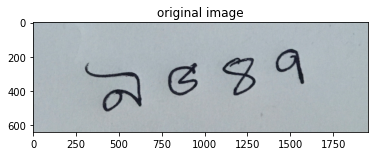

In [159]:
#load the image with string numbers
image=cv2.imread("/content/IMG_6235.jpg")
import imutils
plt.imshow(image)
plt.title("original image")

#reading 
s=segment(image, height=64)
print("lenth of the detected string=",len(s))
allimg=[]
for i in range(0,len(s)):
  img1=s[i]
  gi = cv2.cvtColor(s[i], cv2.COLOR_BGR2GRAY)
  (thresh,im_bw)=cv2.threshold(gi,128,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
  inv=cv2.bitwise_not(im_bw)
  rs=inv.reshape(-1,64,64,1)
  p=np.argmax(model.predict(rs))
  allimg.append(p)
allimg

#converting list to string
str1 = ''.join(str(e) for e in allimg)
print("OCR reading=",str1)

lenth of the number= 3
OCR reading= 159


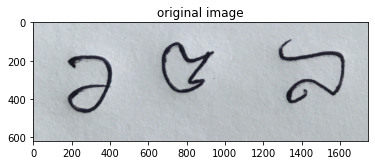

In [158]:
#load the image with string numbers
image=cv2.imread("/content/IMG_6192.jpg")
import imutils
plt.imshow(image)
plt.title("original image")

#reading 
s=segment(image, height=64)
print("lenth of the number=",len(s))
allimg=[]
for i in range(0,len(s)):
  img1=s[i]
  gi = cv2.cvtColor(s[i], cv2.COLOR_BGR2GRAY)
  (thresh,im_bw)=cv2.threshold(gi,128,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
  inv=cv2.bitwise_not(im_bw)
  rs=inv.reshape(-1,64,64,1)
  p=np.argmax(model.predict(rs))
  allimg.append(p)
allimg

#converting list to string
str1 = ''.join(str(e) for e in allimg)
print("OCR reading=",str1)